In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/kaggle/recipe-ingredients-dataset?select=train.json")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahashrai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaggle/recipe-ingredients-dataset


100%|██████████| 2.23M/2.23M [00:00<00:00, 160MB/s]

In [ ]:
import pandas as pd
df=pd.read_json("recipe-ingredients-dataset/test.json")


In [ ]:
df.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [ ]:
df.shape

(9944, 2)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import requests

In [ ]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
data=requests.get('')

In [ ]:

soup=BeautifulSoup(data, 'html.parser')

TypeError: Incoming markup is of an invalid type: <Response [403]>. Markup must be a string, a bytestring, or an open filehandle.

In [ ]:
data

<Response [403]>

In [ ]:
import requests
from bs4 import BeautifulSoup

data = requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav')
# Check if the request was successful
if data.status_code == 200:
    soup = BeautifulSoup(data.content, 'html.parser')  # Use data.content to get the HTML content
    # Proceed with parsing the HTML using 'soup'
else:
    print(f"Request failed with status code: {data.status_code}")
    # Handle the error appropriately, e.g., by retrying the request or skipping the page

Request failed with status code: 403


In [ ]:
dataset=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav',headers=headers).text

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
import  opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/brendan45774/test-file?select=tested.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahashrai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file


100%|██████████| 11.2k/11.2k [00:00<00:00, 7.78MB/s]

In [ ]:
import pandas as pd
df=pd.read_csv('test-file/tested.csv')

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,1043,0,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C
227,1119,1,3,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.7500,NaN,Q
137,1029,0,2,"Schmidt, Mr. August",male,26.0,0,0,248659,13.0000,NaN,S
359,1251,1,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S
195,1087,0,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.isnull().sum().sum()

414

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
numerical_df=df.select_dtypes(include=['number'])
correlation=numerical_df.corr()['Survived']
correlation

,Survived
PassengerId,-0.023245
Survived,1.000000
Pclass,-0.108615
Age,-0.000013
SibSp,0.099943
Parch,0.159120
Fare,0.191514


In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Survived'>

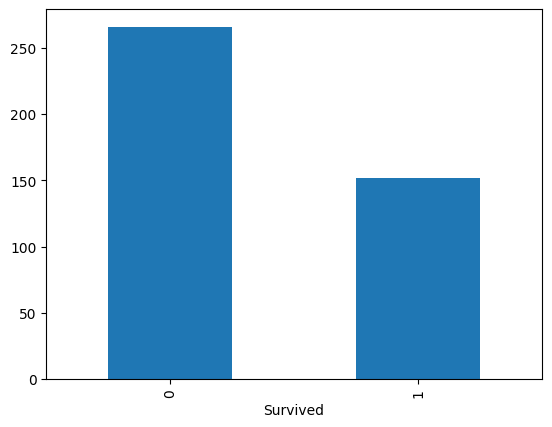

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

In [ ]:
import seaborn as sns
sns.countplot(df['Survived'])

<Axes: ylabel='count'>

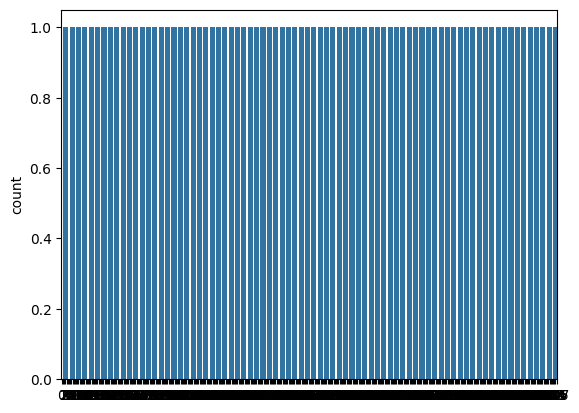

In [ ]:
sns.countplot(df['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

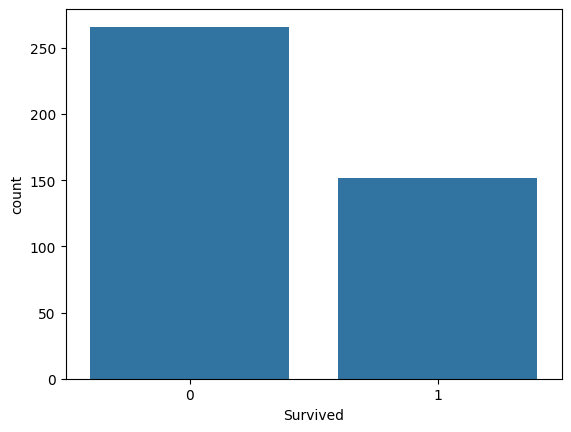

In [ ]:
sns.countplot(x='Survived', data=df)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
202,1094,0,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
21,913,0,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S
125,1017,1,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,NaN,S
190,1082,0,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,NaN,S
174,1066,0,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S


<Axes: xlabel='Pclass'>

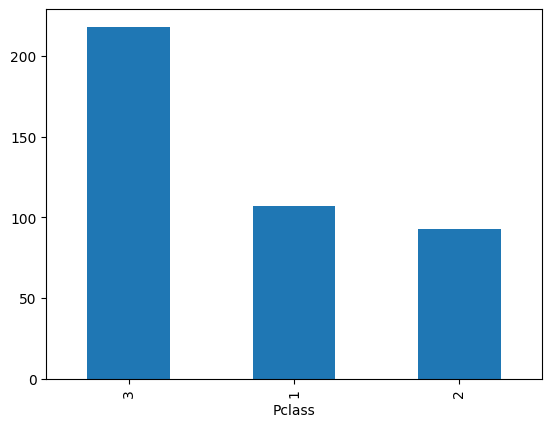

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

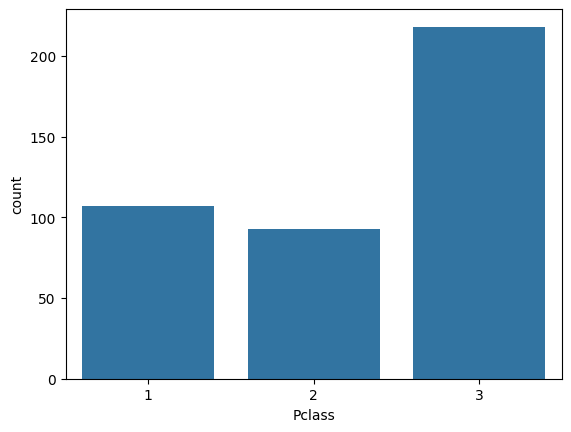

In [ ]:
sns.countplot(x='Pclass', data=df)

<Axes: ylabel='count'>

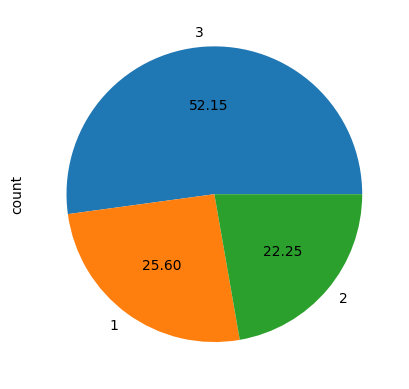

In [ ]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

AttributeError: Rectangle.set() got an unexpected keyword argument 'autopct'

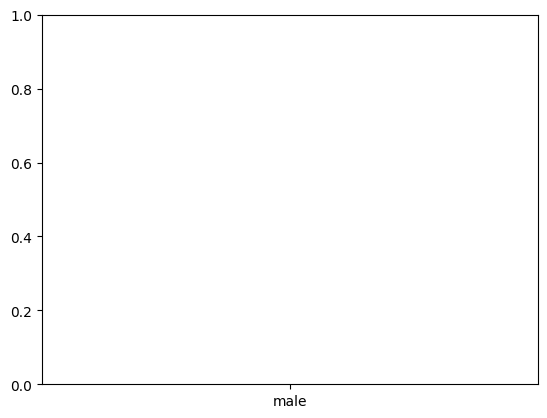

In [ ]:
sns.countplot(x='Sex', data=df,

In [ ]:
import matplotlib.pyplot as plt

(array([ 8.,  3.,  0.,  4.,  1.,  4.,  2.,  3.,  3.,  4.,  2., 20.,  7.,
        25., 17., 28., 11., 25.,  8., 25., 12.,  8.,  7., 10.,  6.,  7.,
        11.,  5.,  5.,  9.,  8.,  5.,  8.,  1.,  3.,  2.,  6.,  3.,  2.,
         4.,  3.,  2.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.17  ,  1.6866,  3.2032,  4.7198,  6.2364,  7.753 ,  9.2696,
        10.7862, 12.3028, 13.8194, 15.336 , 16.8526, 18.3692, 19.8858,
        21.4024, 22.919 , 24.4356, 25.9522, 27.4688, 28.9854, 30.502 ,
        32.0186, 33.5352, 35.0518, 36.5684, 38.085 , 39.6016, 41.1182,
        42.6348, 44.1514, 45.668 , 47.1846, 48.7012, 50.2178, 51.7344,
        53.251 , 54.7676, 56.2842, 57.8008, 59.3174, 60.834 , 62.3506,
        63.8672, 65.3838, 66.9004, 68.417 , 69.9336, 71.4502, 72.9668,
        74.4834, 76.    ]),
 <BarContainer object of 50 artists>)

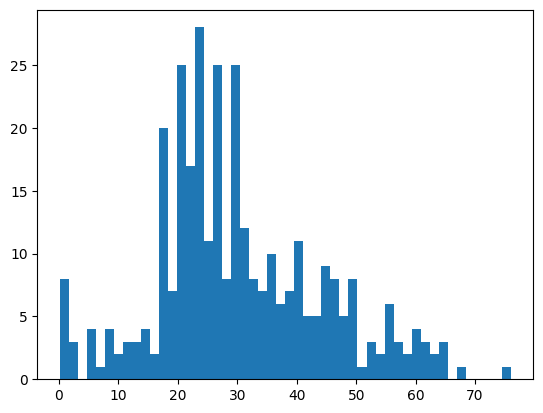

In [ ]:
plt.hist(df['Age'], bins=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier=RandomForestClassifier(n_estimators=2, max_depth=4)

In [ ]:
classifier.fit(X, y, sample_weight=None, check_input=True, warm_start=False)

NameError: name 'X' is not defined

In [ ]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
 |  The sub-sample size is controlled with the `max_samples` paramet

<ipython-input-73-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

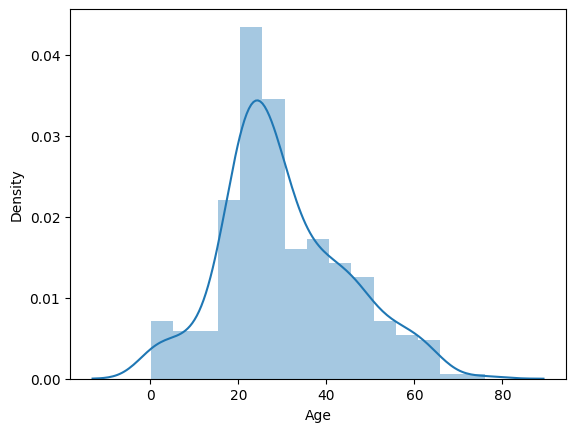

In [ ]:
sns.distplot(df['Age'])

<Axes: ylabel='Fare'>

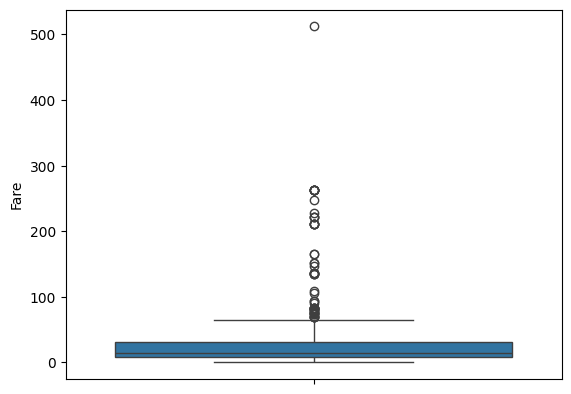

In [ ]:
sns.boxplot(df['Fare'])

In [ ]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1b239756a334c67123b1ac8d74e098720cd901c2266e053e4b6bd77611d1f57c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

In [ ]:
from pandas_profiling import ProfileReport

AttributeError: module 'numba' has no attribute 'generated_jit'

In [ ]:
!pip install --upgrade pandas-profiling

In [ ]:
!pip install --upgrade numba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2],)

In [10]:
df.sample(5 )

,0,1,2
132,3,12.81,2.31
54,1,13.74,1.67
15,1,13.63,1.81
84,2,11.84,0.89
109,2,11.61,1.35


In [15]:
df.columns=['ClassLabels', 'Alcohols', 'Malic Acid']

In [16]:
df.head()

,ClassLabels,Alcohols,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [18]:
help('read_csv')

No Python documentation found for 'read_csv'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



<Axes: xlabel='Malic Acid', ylabel='Density'>

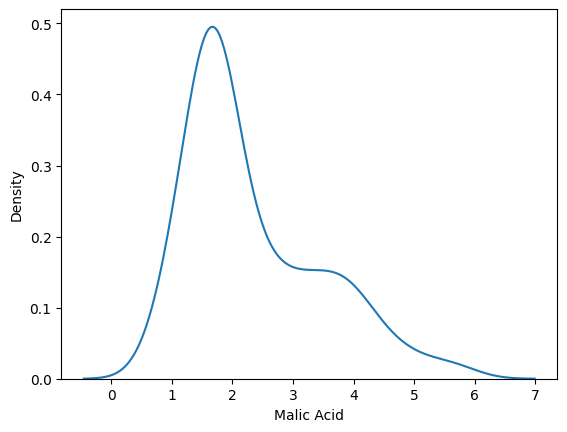

In [21]:
import seaborn as sns
sns.kdeplot(df['Malic Acid'])


In [23]:
sns.scatterplot(df['Alcohols'], df['Malic Acid'], hue=df['ClassLabels'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Axes: xlabel='Alcohols', ylabel='Malic Acid'>

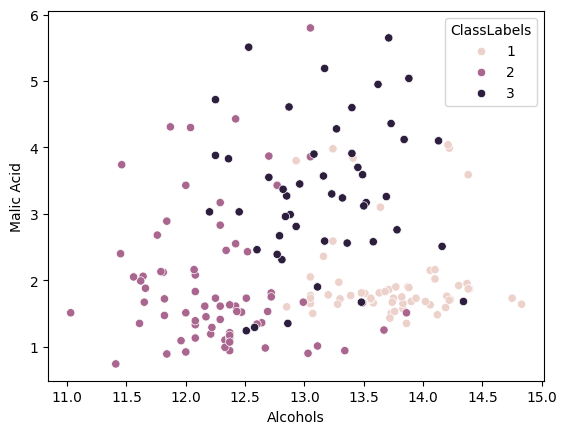

In [24]:
sns.scatterplot(x="Alcohols", y="Malic Acid", hue="ClassLabels", data=df)

<Axes: xlabel='Alcohols', ylabel='Malic Acid'>

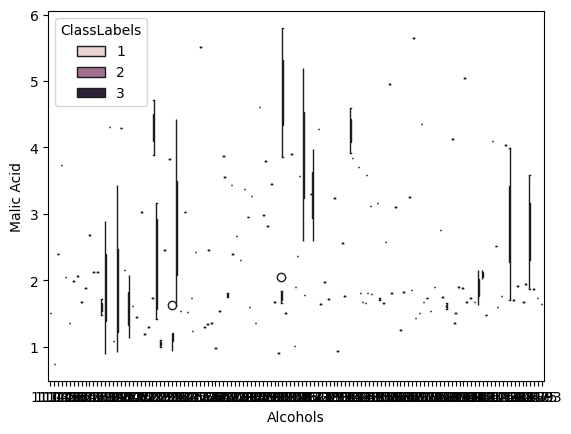

In [25]:
sns.boxplot(x='Alcohols', y=
            'Malic Acid', hue='ClassLabels', data=df)
sns.boxplot(x='Alcohols', y='Malic Acid', hue='ClassLabels', data=df)

In [28]:
df.sample(5)

,ClassLabels,Alcohols,Malic Acid
127,2,11.79,2.13
104,2,12.51,1.73
102,2,12.34,2.45
64,2,12.17,1.45
34,1,13.51,1.80


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassLabels', axis=1), df['ClassLabels'], test_size=0.3, random_state=0)

In [31]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [32]:
y_train.shape, y_test.shape


((124,), (54,))

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()

In [35]:
scaler.fit(X_train)

MinMaxScaler()

In [36]:
X_train_Scaled=scaler.transform(X_train)
X_test_Scaled=scaler.transform(X_test)


In [37]:
X_train_Scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [38]:
X_test_Scaled

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

In [39]:
X_train.describe()

,Alcohols,Malic Acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [44]:
import numpy as np
df_scaled=pd.DataFrame(X_train_Scaled)


In [45]:
df_scaled.describe()

,0,1
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


In [ ]:
max 100 and 100 is the world mean the world


In [ ]:
ljkfdfjiejldkjfiejfdkjaojljdifjeljoisalfj s